## <center> Evaluate Results </center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
result_LR = pd.read_csv('output/result_LR.csv')
result_SVM_LR = pd.read_csv('output/result_SVM_LR.csv')
result_SVM_RBF = pd.read_csv('output/result_SVM_RBF.csv')
result_DT = pd.read_csv('output/result_DT.csv')
result_EL = pd.read_csv('output/result_EL.csv')
result_DB = pd.read_csv('output/result_DB.csv')

result_df = pd.concat([result_LR, result_SVM_LR, result_SVM_RBF, result_DT, result_EL, result_DB], axis=0)
result_df.reset_index(drop=True, inplace=True)
result_df.head(100)

,model,task_no,vectorizer,ngram,max_iter,C,gamma,tree_param,n_estimator,lrate,batch_size,num_epoch,weight_decay,test_accuracy,wall_time,run_time
0,LogisticRegression,1,cbow,1,100000,NaN,NaN,NaN,0,0.00000,0,0,0.00,0.744031,1.407014,2024-11-21 15:03:54
1,LogisticRegression,2,tfidf,1,100000,NaN,NaN,NaN,0,0.00000,0,0,0.00,0.755492,0.100751,2024-11-21 15:03:55
2,LogisticRegression,3,cbow,2,100000,NaN,NaN,NaN,0,0.00000,0,0,0.00,0.755492,5.175322,2024-11-21 15:04:04
3,LogisticRegression,4,tfidf,2,100000,NaN,NaN,NaN,0,0.00000,0,0,0.00,0.774594,0.912080,2024-11-21 15:04:10
4,LogisticRegression,5,cbow,3,100000,NaN,NaN,NaN,0,0.00000,0,0,0.00,0.764088,10.898583,2024-11-21 15:04:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"Ensemble (LR, SVM LR, RBF, DT)",2,tfidf,2,100000,1.0,scale,full_tree,0,0.00000,0,0,0.00,0.702006,573.000467,11/22/2024 1:47
69,"Ensemble (LR, SVM LR, RBF, DT)",3,tfidf,3,100000,1.0,scale,full_tree,0,0.00000,0,0,0.00,0.679083,1778.641684,11/22/2024 2:18
70,"Ensemble (LR, RBF, DT)",2,tfidf,2,100000,1.0,scale,full_tree,0,0.00000,0,0,0.00,0.672397,294.813604,11/22/2024 8:52
71,"Ensemble (LR, RBF, DT)",3,tfidf,3,100000,1.0,scale,full_tree,0,0.00000,0,0,0.00,0.664756,690.231714,11/22/2024 9:05


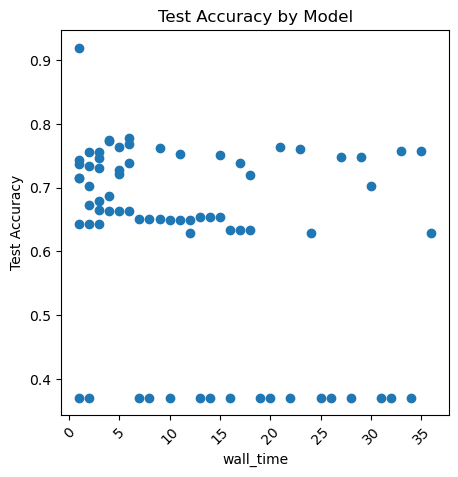

Index(['model', 'task_no', 'vectorizer', 'ngram', 'max_iter', 'C', 'gamma',
       'tree_param', 'n_estimator', 'lrate', 'batch_size', 'num_epoch',
       'weight_decay', 'test_accuracy', 'wall_time', 'run_time'],
      dtype='object')


In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(result_df['task_no'], result_df['test_accuracy'])
plt.title('Test Accuracy by Model')
plt.xlabel('wall_time')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.show()
print(result_df.columns)

C:\Users\ceffendy\AppData\Local\Temp\ipykernel_27608\209620958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['color'] = filtered_df['model'].map(color_map)


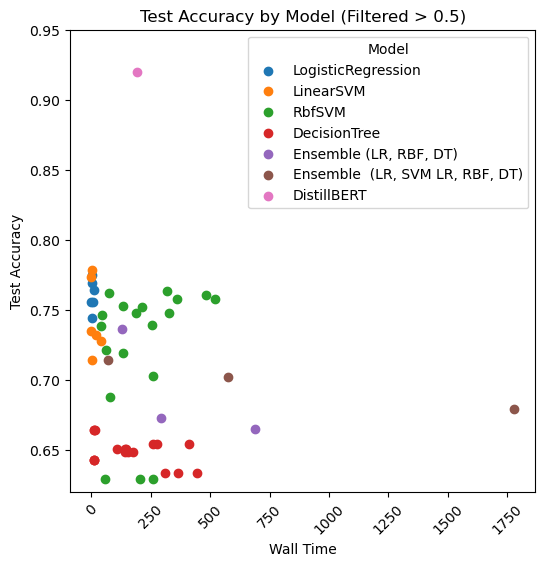

In [4]:

# Filter out rows with test_accuracy below 0.5
filtered_df = result_df[result_df['test_accuracy'] >= 0.5]

# Assign colors to each model
unique_models = filtered_df['model'].unique()
color_map = {model: color for model, color in zip(unique_models, plt.cm.tab10.colors)}
filtered_df['color'] = filtered_df['model'].map(color_map)

# Get the top 5 rows by test accuracy
top_5 = filtered_df.nlargest(5, 'test_accuracy')

# Plot
plt.figure(figsize=(6, 6))
plt.ylim(0.62, 0.95)
for model in unique_models:
    model_data = filtered_df[filtered_df['model'] == model]
    plt.scatter(model_data['wall_time'], model_data['test_accuracy'], label=model, color=color_map[model])

# # Label top 5 points
# for _, row in top_5.iterrows():
#     plt.text(row['wall_time'], row['test_accuracy'], row['task_no'], fontsize=8, ha='left')

plt.title('Test Accuracy by Model (Filtered > 0.5)')
plt.xlabel('Wall Time')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Model')